In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "202101-divvy-tripdata" "202102-divvy-tripdata" "divvy-tripdata"

In [2]:
Introduction

This analysis is for the capstone project which is a part of the Google Data Analytics Certificate course.

SCENARIO

Cyclistic is a bike ship program uses bikes that can be unlocked from any station and can be returned to any other station in the system at any time.  Customers who purchase single ride or full day passes are referred to as casual riders and customers who purchase annual membership are considered as Cyclistic members. It has been discovered by Cyclistic financial experts that yearly membership is more lucrative than casual riding.

Objective

My objective create a marketing strategy to convet  casual riders into annual members. I will be analysing Cyclistic’s historical bike trip data to identify trends and to comprehend how annual members and casual riders differ, why the casual riders would buy a membership and how digital media could affect their marketing tactics. 

Data 

 I was instructed to use Cyclistic’s historical trip data. I will be using the dataset that was made public by Motivate International Inc, under the license. The data is reliable and authentic. It is comprehensive, current, and cited. I downloaded the data and stored it appropriately on my local computer. I have downloaded data from January 21 – December 21. The data is in CVS format and there are a total of 13 columns. I utilized R to clean and analyze the data as it could process the the data more quickly than Excel. I then visualized the data using Tableau.


PREPARE

Step 1:	Installed R packages (tidyverse, lubridate etc) for data manipulation.


ERROR: Error in parse(text = x, srcfile = src): <text>:3:6: unexpected symbol
2: 
3: This analysis
        ^


In [ ]:
#Install packages 
install.packages("tidyverse")
install.packages("tidyr")

install.packages('lubridate')



Step 2.	Loaded R packages.

In [ ]:
#Load packages

library(tidyr)

library(tidyverse)
library(dplyr)
library (lubridate)
library(readr)
library(janitor)


Step 3.	Uploaded individual month’s CSV files using the read.csv function and created data frames for each month.

In [ ]:
## import data in R studio


jan=read.csv("/kaggle/input/202101-divvy-tripdata/202101-divvy-tripdata.csv")
feb=read.csv("/kaggle/input/202102-divvy-tripdata/202102-divvy-tripdata.csv")
mar=read.csv("/kaggle/input/divvy-tripdata/202103-divvy-tripdata.csv")
apr=read.csv("/kaggle/input/divvy-tripdata/202104-divvy-tripdata.csv")
may=read.csv("/kaggle/input/divvy-tripdata/202105-divvy-tripdata.csv")

jun=read.csv("/kaggle/input/divvy-tripdata/202106-divvy-tripdata.csv")

jul=read.csv("/kaggle/input/divvy-tripdata/202107-divvy-tripdata.csv")

aug=read.csv("/kaggle/input/divvy-tripdata/202108-divvy-tripdata.csv")

sep=read.csv("/kaggle/input/divvy-tripdata/202109-divvy-tripdata.csv")

oct=read.csv("/kaggle/input/divvy-tripdata/202110-divvy-tripdata.csv")

nov=read.csv("/kaggle/input/divvy-tripdata/202111-divvy-tripdata.csv")

dec=read.csv("/kaggle/input/divvy-tripdata/202112-divvy-tripdata.csv")






Step 4.Compare the column names and data structures of each of the files are consistent

In [ ]:
#Compare the column names of each of the files 

colnames(jan)
colnames(feb)
colnames(mar)
colnames(apr)
colnames(may)
colnames(jun)
colnames(jul)
colnames(aug)
colnames(sep)
colnames(oct)
colnames(nov)
colnames(dec)

# checking data structures

str(jan)
str(feb)
str(mar)
str(apr)
str(may)
str(jun)
str(jul)
str(aug)
str(sep)
str(oct)
str(nov)
str(dec)

Step 5.	Combined all the data frames into one data frame to aggregate all the data using the bind_rows function. Titled the data frame “comb2021”.

In [ ]:
## merge individual monthly data frames into one large data frame

comb2021=bind_rows(jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec)

Step 6. Checked the new data frame that was created for any inconsistencies



In [ ]:
#Check if the data structures are consistent
colnames(comb2021)
nrow(comb2021)
dim(comb2021)
head(comb2021)
str(comb2021)
summary(comb2021)

Step 7. Create columns for date, month, day, year and day of week to analyze data better








In [ ]:
comb2021$date=as.Date(comb2021$started_at)
comb2021$month=format(as.Date(comb2021$date),"%B")
comb2021$day=format(as.Date(comb2021$date),"%d")
comb2021$year=format(as.Date(comb2021$date),"%Y")
comb2021$dayofweek=format(as.Date(comb2021$date),"%A")


Step 8. Calculate ride length by subtracting ended_at time from started_at time and converted it to minutes

In [ ]:
comb2021$ride_length=difftime(comb2021$ended_at,comb2021$started_at, units="mins")

Step 9. Clean the data

a). Remove 0 and negative values


In [ ]:
comb2021new=comb2021[!(comb2021$ride_length<=0),]


Step 9 b). Delete unneeded rows

In [ ]:
comb2021new <- comb2021 %>% select(-c(ride_id, start_station_id, end_station_id,start_lat,start_lng,end_lat,end_lng)) 


Step 9 c). Remove duplicate rows

In [ ]:
comb2021new <- distinct(comb2021)

Step 9 d). Replace blank space with NA


In [ ]:
comb2021new[comb2021new == ''] <- NA


Step 9 e).Remove NA values


In [ ]:
comb2021new<- drop_na(comb2021new)

head(comb2021new)

Step 10. Descriptive Analysis

a)total number of rides


In [ ]:
nrow(comb2021new)


Step 10 b). Count of casual and member type users:

In [ ]:
comb2021new %>%
  group_by(member_casual) %>% 
  count(member_casual)


Step 10 c).Count of bike types used per member type:

In [ ]:
comb2021new %>% 
  group_by(member_casual) %>% 
  count(rideable_type)


Step 10 d).average of ride_length(minutes)

In [ ]:
comb2021new_avgRidelen <- mean(comb2021new$ride_length)
comb2021new_avgRidelen

Step 10 e).Total rides on each day of the week by member type 


In [ ]:
comb2021new %>%
  group_by(member_casual) %>% 
  count(dayofweek)


Step 10 f). Total rides for each month by member type 

In [ ]:
comb2021new %>%
  group_by(member_casual) %>% 
  count(month) %>% 
  print(n = 24) 


Step 11. The top 10 start station for casual and member riders.
Storing it in a new dataframe

 


In [ ]:

comb2021new1 <- comb2021new %>% 
  group_by(member_casual, start_station_name) %>% 
  summarise(station_count = n()) %>% 
  arrange(desc(station_count))%>% 
  slice(1:10)

Step 12. The top 10 end station for casual and member riders.
Storing it in a new dataframe








In [ ]:
comb2021new2 <- comb2021new %>% 
  group_by(member_casual, end_station_name) %>% 
  summarise(station_count = n()) %>%
  arrange(desc(station_count)) %>% 
  slice(1:10)

Step 13. Combining both the dataframes



In [ ]:
comb2021new3=cbind(comb2021new1,comb2021new2)


Visualization Using Tableau


##### Member type percentage distribution

Annual members make 55% and  casual riders make 45% of total riders. Still casual riders could potentially boost Cyclistic's earnings if they were choose to become annual members.


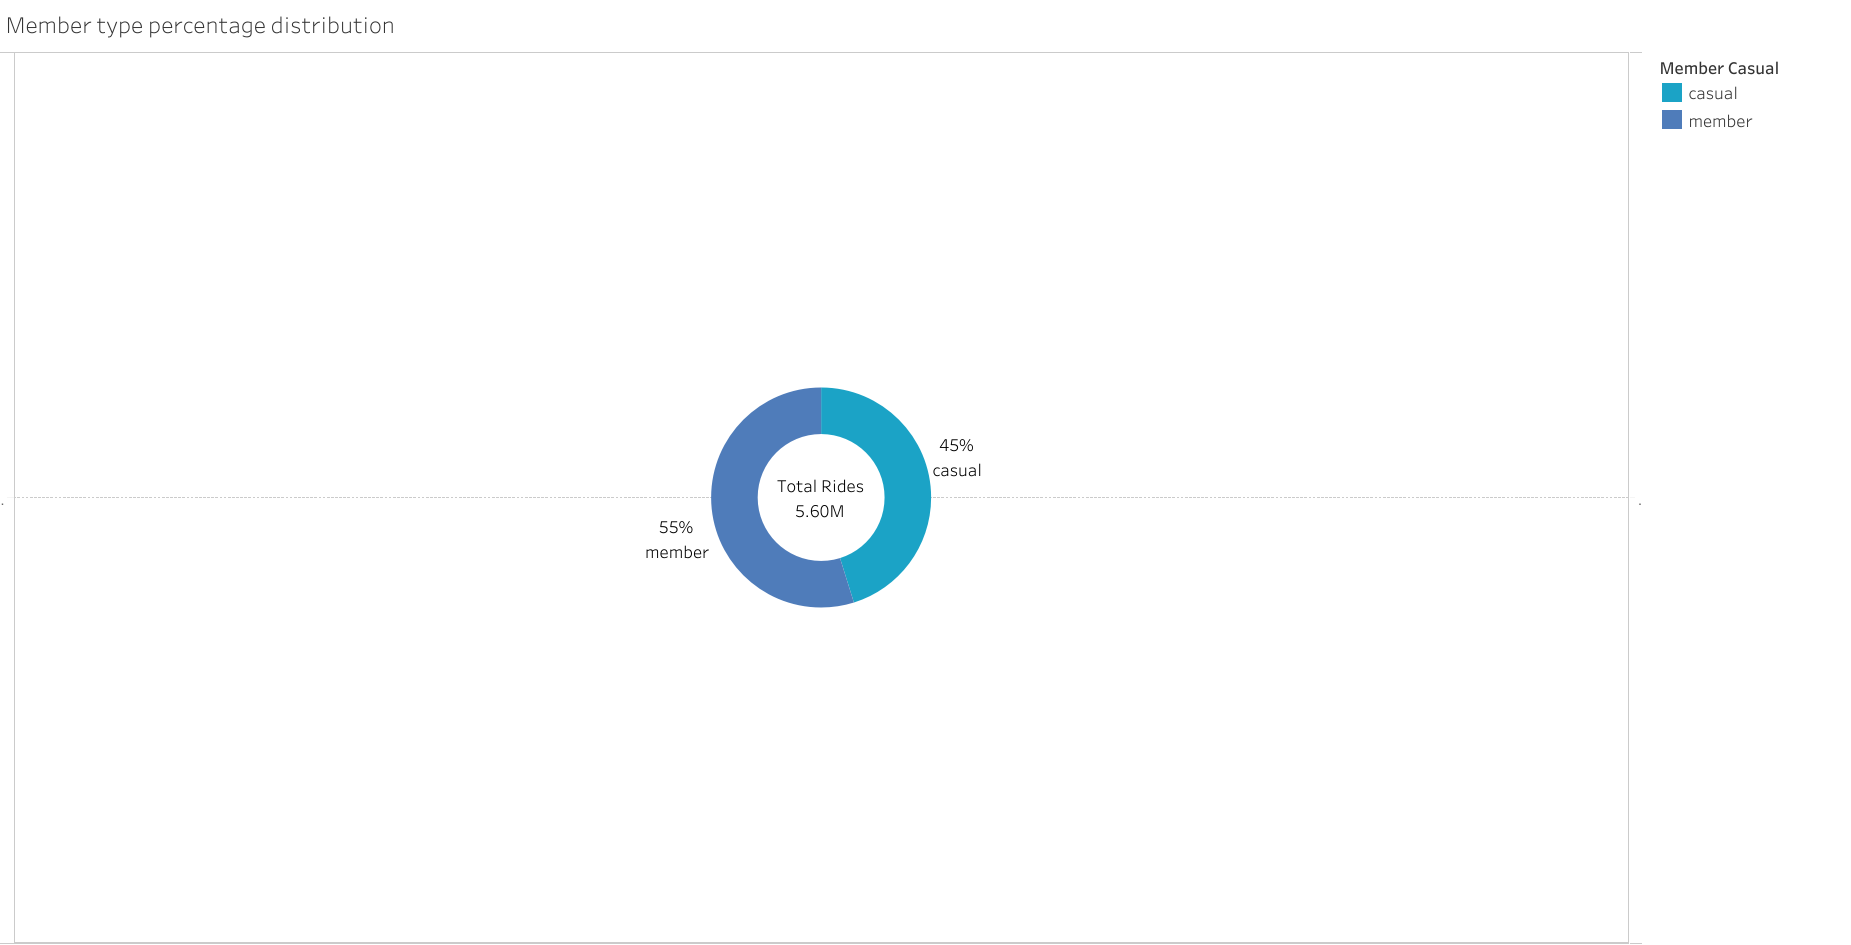

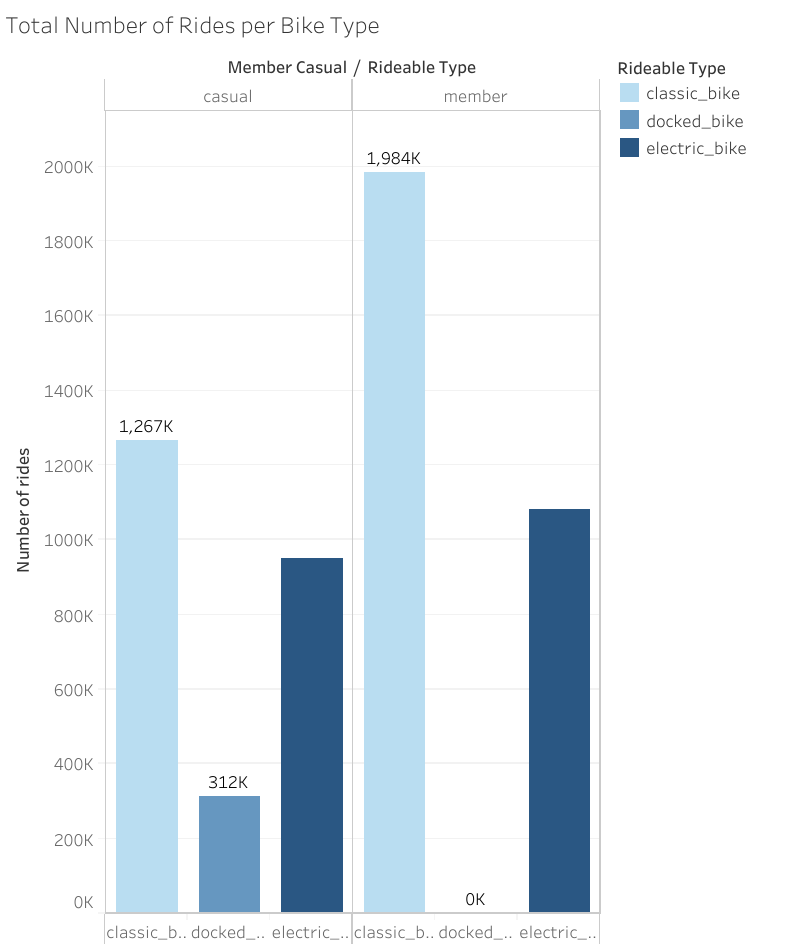

Both casual riders and annual members rely on classic bikes the most, followed by electric bikes and docked bikes. 

**Rides Count and Average Ride Duration by Member Type per Month**

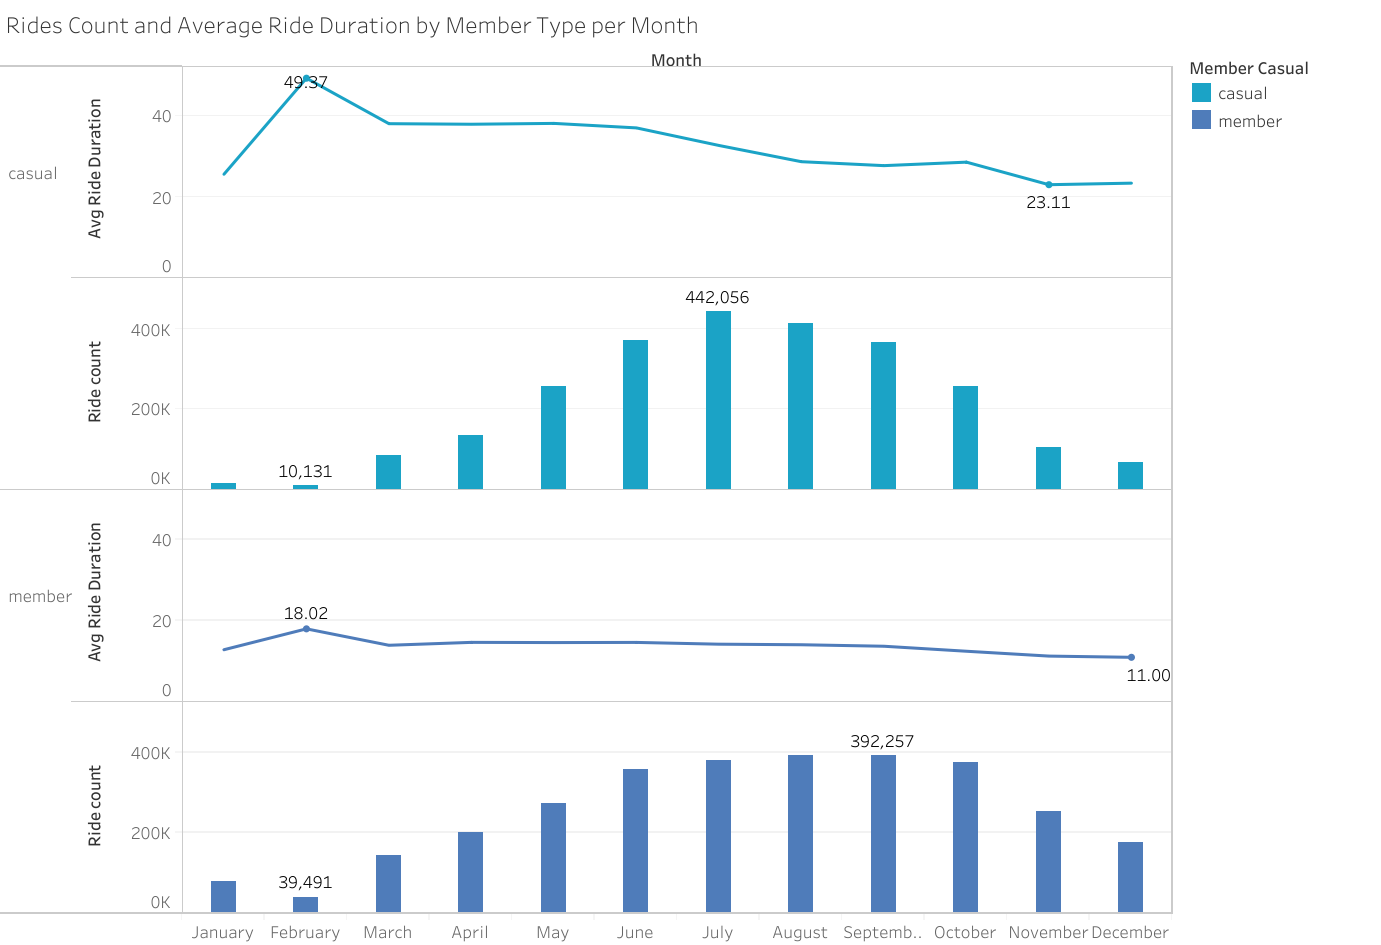

The number of rides and Average Ride Duration by Member Type per Month is visualised. Both casual and members have the least ride count in February, probably due to the cold weather. Casual members have the highest number of trips in July and annual members have the highest number of trips in September, both warm months. Casual riders average ride duration is longer than annual members. Average ride length remain constant for members throughout the year.

Rides Count and Average Ride Duration by Member Type per Day of week

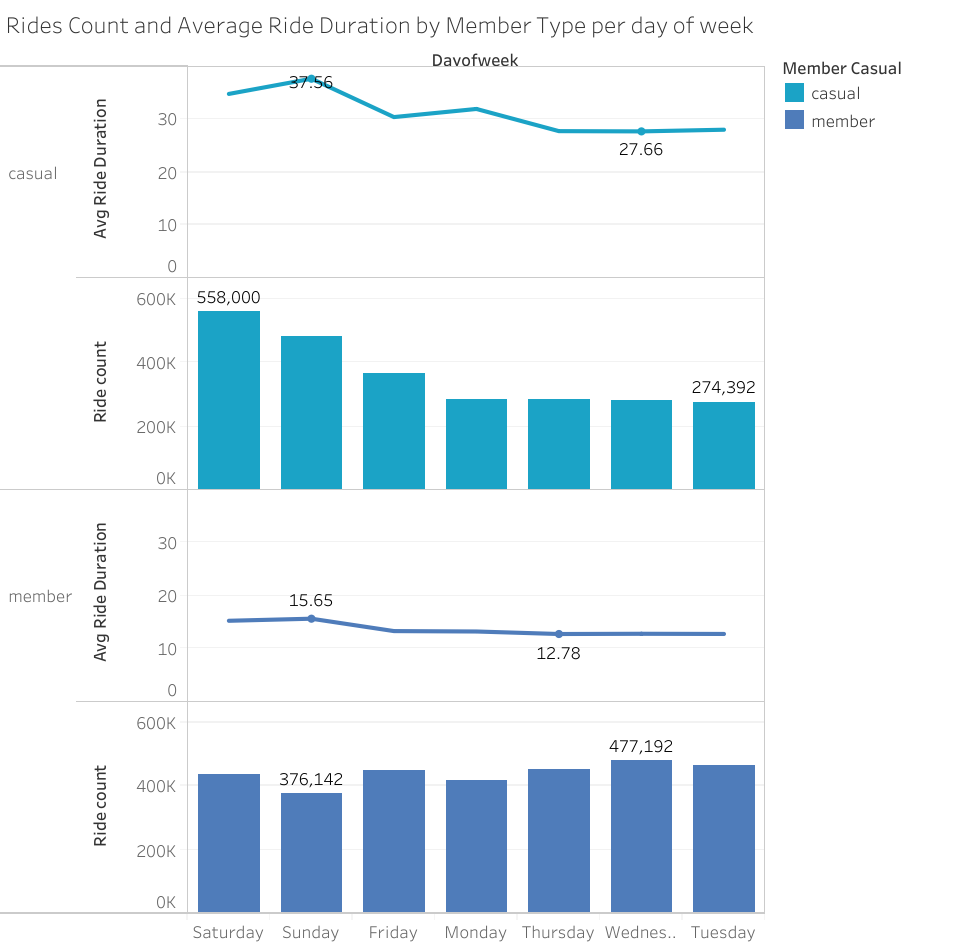

Upon analysing the data, it is evident that casual riders utilise the app more frequently on weekends than they do during the week, whereas member riders use the app less frequently on weekends than they do during the week.
Sunday has the longest riding time for both casual riders and annual members indicating that the cyclists prefer to go on longer rides in the weekend.

Top 10 Start Station Names

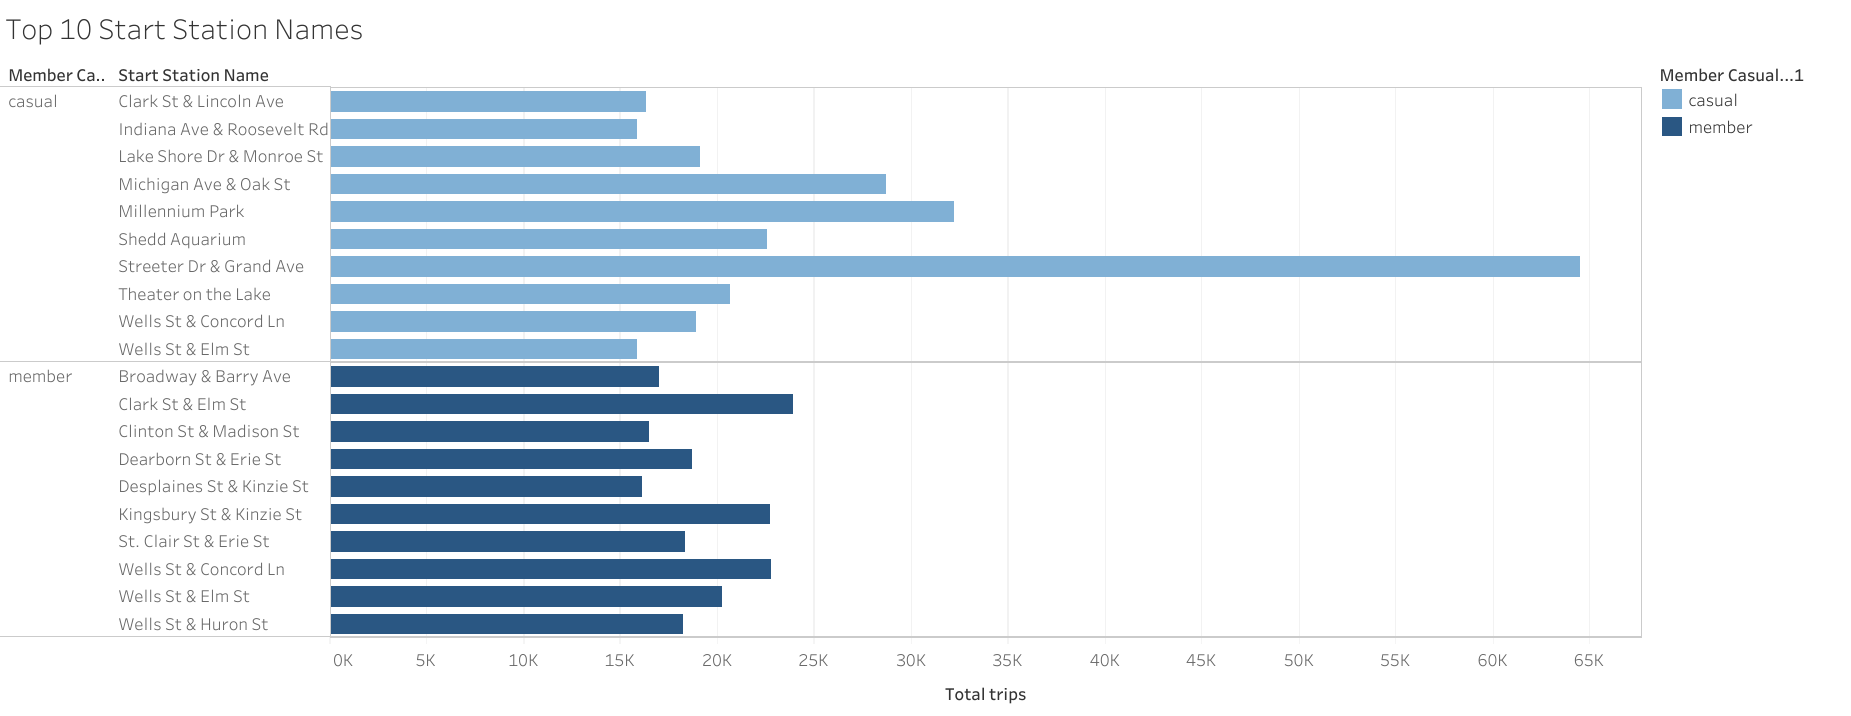

The most visited starting for casual riders is Streeter Dr & Grand Ave and for annual members is Clark & Elm St.

Top 10 End Station Names

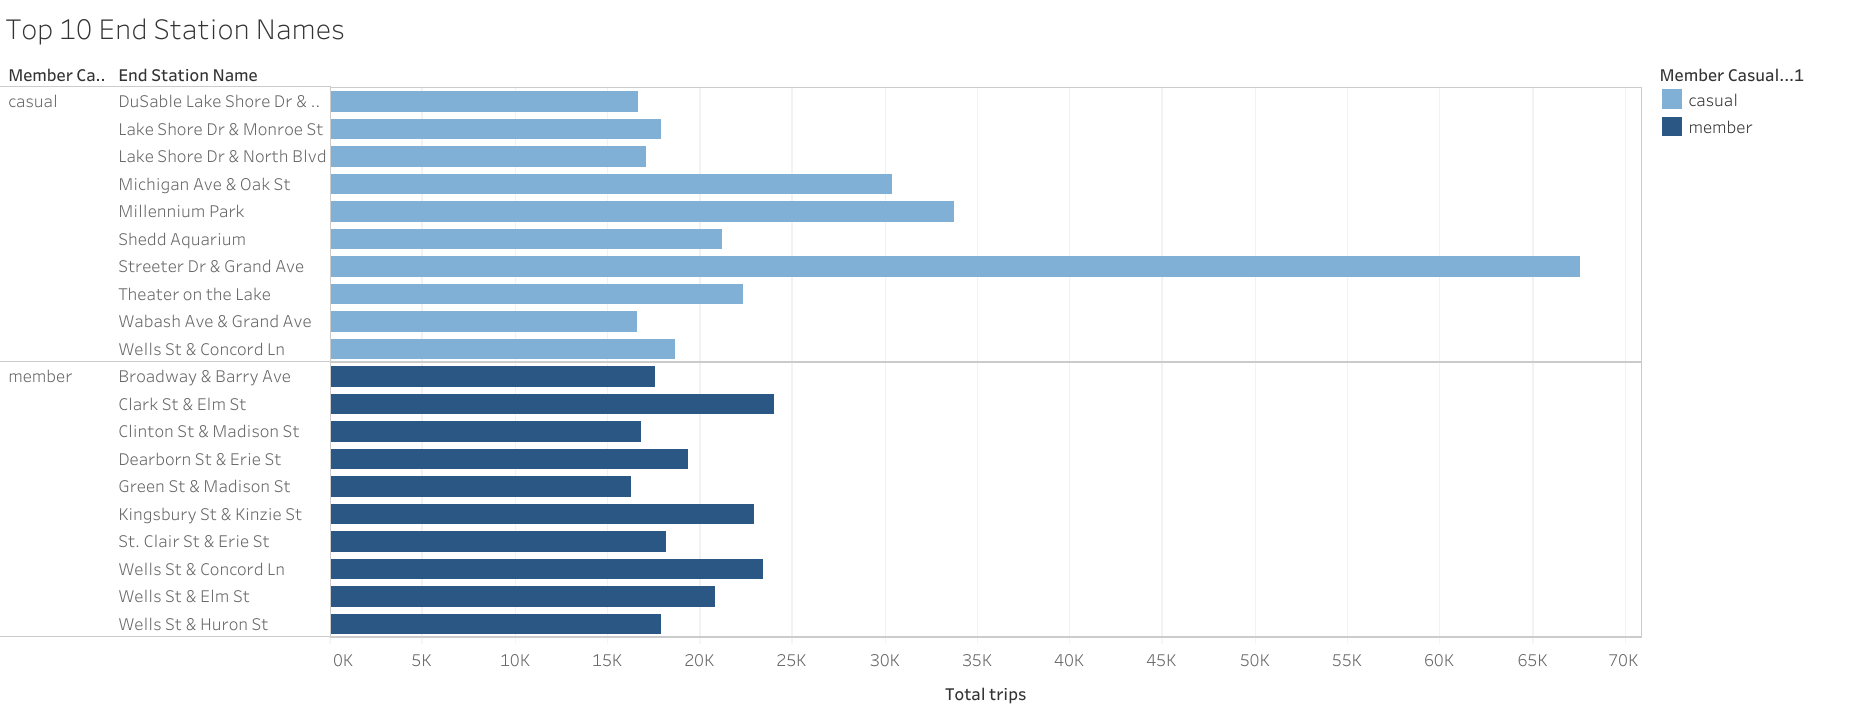

The most visited ending station for casual riders is Streeter Dr & Grand Ave and for annual members is Clark & Elm St.

Recommendations

1)As the highest number of trips for  Casual members is in July and annual members is in September, both warm months, the advertisement campagin must be accelerated in these months. Also, special offers can be curated for the cold months 

2) Casual members ride for longer duration, introducing incentives for long rides for members will encourage members to ride for long duration and casual riders to become members.

3) Since casual riders utilise the app more frequently on weekends than they do during the week for lesiure or short travels, special discounts must be given for members on the weekends to encourage casual riders to convert to annual members.

4) Both casual riders and annual members rely on classic bikes the most, followed by electric bikes and docked bikes the number of classic bikes can be increased and offers should be placed for these

5)Since the most visited starting and ending station is Streeter Dr & Grand Ave and Clark & Elm St. more advertisements should be placed in these locations.


